Autor: Veronika Verbirsová<br>
Vypracováno: 10.03.2022

# <center>Analýza recenzí dámského oblečení anonymního e-shopu</center>

Zdroj dat: [Women's E-Commerce Clothing Reviews | Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) (otevřená data, .csv soubor) <br>
Datový soubor obsahuje zákaznické recenze artiklů e-shopu s dámským oblečením. Mimo to i věk recenzenta; číselné hodnocení artiklu (1-nejhorší až 5-nejlepší); doporučení (0-nedoporučuje, 1-doporučuje); počet dalších zákazníků, kteří považovali tuto recenzi za užitečnou; název divize; název oddělení; a název kategorie  <br>
Autor získal data pomocí web scrapingu (okolo roku 2016). Protože se jedná o skutečné komerční údaje, tyto byly anonymizovány a odkazy na společnost v textu recenze byly nahrazeny výrazem „retailer“.



![Shopping](shopping.png "Shopping")

In [1]:
import numpy as np # práce s numerickými daty
import pandas as pd # práce s tabulkami
import matplotlib.pyplot as plt # vykreslení grafů
import seaborn as sns # statistické grafy
from PIL import Image # práce s obrázky
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # vizualizace textových dat

In [2]:
# načtení dat ze souboru
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col = 0 )

## Info a první řádky tabulky

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Čištění a příprava dat

In [5]:
# Zjistíme chybějící hodnoty v procentech
data.isnull().sum()/data.shape[0]*100

Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

In [6]:
# Chybějící hodnoty ve sloupcích Title a Review Text změníme na prázdný textový řetězec
data['Title'] = data['Title'].fillna('')
data['Review Text'] = data['Review Text'].fillna('')

# Tyto sloupce spojíme dohromady, vznikne sloupec Review
data['Review'] = data['Title'] + ' ' + data['Review Text']

In [7]:
# Odstraníme sloupce Title, Review Text, Clothing ID a Positive Feedback Count
data = data.drop(['Title', 'Review Text', 'Clothing ID'], axis = 1)

# Odstraníme záznamy s chybějícími hodnotami
data.dropna(axis = 0, inplace = True)

In [8]:
# Přejmenujeme sloupce
data = data.rename(columns = {'Recommended IND' : 'Recommended', 'Positive Feedback Count' : 'Feedback',
                              'Division Name' : 'Division', 'Department Name' : 'Department', 'Class Name' : 'Class'})

In [9]:
# Zjistíme jaké jsou jednotlivé hodnoty ve sloupcích Rating, Division, Department a Class
print(np.unique(data['Rating'].values))
print(data['Division'].unique())
print(data['Department'].unique())
print(data['Class'].unique())

[1 2 3 4 5]
['Initmates' 'General' 'General Petite']
['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend']
['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [10]:
# Opravíme překlep v názvu divize
data['Division'] = data['Division'].str.replace('Initmates', 'Intimates')

In [11]:
# Vytvoříme sloupec s délkou recenze
data['ReviewLength'] = data['Review'].apply(len)

In [12]:
# Aktuální počet řádků a sloupců
data.shape

(23472, 9)

In [13]:
data.head()

,Age,Rating,Recommended,Feedback,Division,Department,Class,Review,ReviewLength
0,33,4,1,0,Intimates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...,54
1,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...,304
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,524
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,209


##  Základní analýza

In [14]:
data.describe()

,Age,Rating,Recommended,Feedback,ReviewLength
count,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000
mean,43.200707,4.195552,0.822256,2.537151,314.658913
std,12.280913,1.110188,0.382305,5.703597,156.784998
min,18.000000,1.000000,0.000000,0.000000,1.000000
25%,34.000000,4.000000,1.000000,0.000000,188.000000
50%,41.000000,5.000000,1.000000,1.000000,310.000000
75%,52.000000,5.000000,1.000000,3.000000,470.000000
max,99.000000,5.000000,1.000000,122.000000,557.000000


<span style="color:darkkhaki"></span>

In [15]:
data.corr()

,Age,Rating,Recommended,Feedback,ReviewLength
Age,1.000000,0.026967,0.030712,0.043049,0.025561
Rating,0.026967,1.000000,0.792311,-0.064820,-0.076721
Recommended,0.030712,0.792311,1.000000,-0.068954,-0.049273
Feedback,0.043049,-0.064820,-0.068954,1.000000,0.209131
ReviewLength,0.025561,-0.076721,-0.049273,0.209131,1.000000


#### Vidíme silný vztah mezi ohodnocením výrobku a jeho (ne)doporučením (0,79), což se dalo předpokládat. Dále slabou korelaci mezi délkou recenze a počtem označení recenze jako užitečné (0,21). Žádné jiné vztahy nevidíme, například věk nemá vliv na hodnocení výrobku nebo délku recenze.

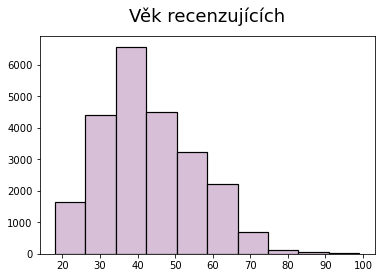

In [16]:
# Zjistíme rozložení věku recenzujících
data['Age'].plot(kind = 'hist', edgecolor = 'black', linewidth = 1.2, color = ['thistle'])
plt.title('Věk recenzujících', fontsize = 18, pad = 15)
plt.ylabel('');

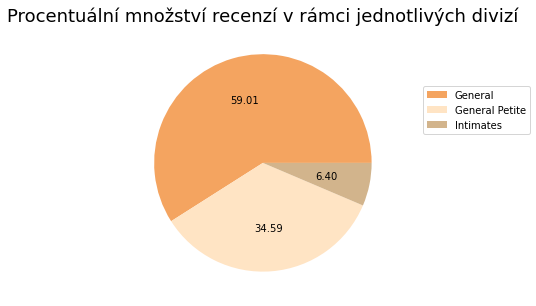

In [26]:
# Zjistíme, která divize má nejvíce recenzí
data['Division'].value_counts().plot(kind = 'pie', autopct = '%.2f',  figsize = (5,5),
                                     colors = ['sandybrown', 'bisque', 'tan'], labeldistance = None)
plt.title('Procentuální množství recenzí v rámci jednotlivých divizí', fontsize = 18)  
plt.legend(bbox_to_anchor = (1.5, 0.8))
plt.ylabel('');

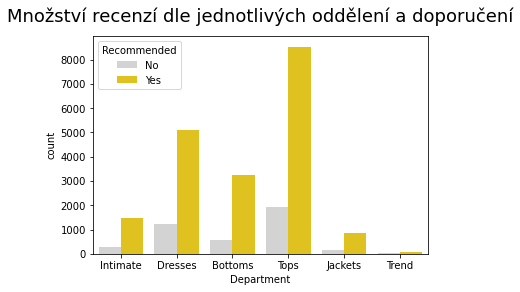

In [18]:
# Porovnáme množství recenzí u jednotlivých oddělení dle doporučení
sns.countplot(data = data, x = 'Department', hue = 'Recommended', palette = ['lightgrey','gold']) 
plt.title('Množství recenzí dle jednotlivých oddělení a doporučení', fontsize = 18, pad = 15)
plt.legend(title = 'Recommended', loc = 'upper left', labels = ['No', 'Yes']);

#### V rámci oddělení vedou vrchní části oděvu následované šaty, dále nás ale bude zajímat, jaké kategorie obsahují jednotlivá oddělení.

In [19]:
# Zjistíme jaké jsou kategorie v jednotlivých odděleních
data.groupby('Department')['Class'].unique()

Department
Bottoms        [Pants, Skirts, Jeans, Shorts, Casual bottoms]
Dresses                                             [Dresses]
Intimate    [Intimates, Lounge, Sleep, Swim, Legwear, Laye...
Jackets                                  [Outerwear, Jackets]
Tops                   [Blouses, Knits, Sweaters, Fine gauge]
Trend                                                 [Trend]
Name: Class, dtype: object

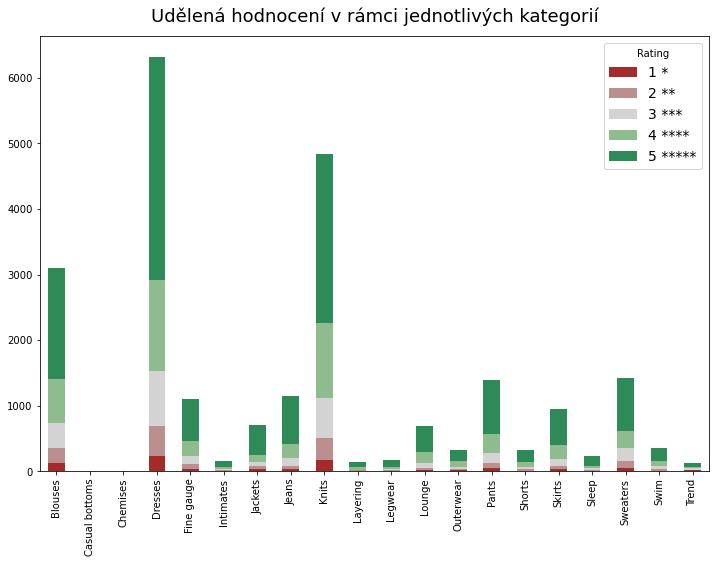

In [20]:
# Porovnáme udělené hodnocení v rámci jednotlivých kategorií
data.groupby(['Rating', 'Class']).size().unstack(0).plot.bar(stacked = True, figsize = (12, 8),
                                                             color = ['brown', 'rosybrown', 'lightgray', 'darkseagreen', 'seagreen'])
plt.title('Udělená hodnocení v rámci jednotlivých kategorií', fontsize = 18, pad = 15, loc = 'center')
plt.legend( ('1 *', '2 **', '3 ***', '4 ****', '5 *****'), title = 'Rating', fontsize = 14)
plt.xlabel('');

#### Nyní vidíme, že nejoblíbenější a nejvíce recenzovanou kategorií jsou šaty, následované halenkami a pleteninami v rámci vrchní části oděvu.

##  Analýza textu - recenzí

In [21]:
# Převedeme text na malá písmena
data['Review'] = data['Review'].str.lower()

In [22]:
# Rozdělíme recenze dle hodnocení na pozitivní(4, 5), neutrální(3) a negativní(1, 2)
positive = data[data['Rating'] > 3]
negative = data[data['Rating'] < 3]
neutral = data[data['Rating'] == 3]

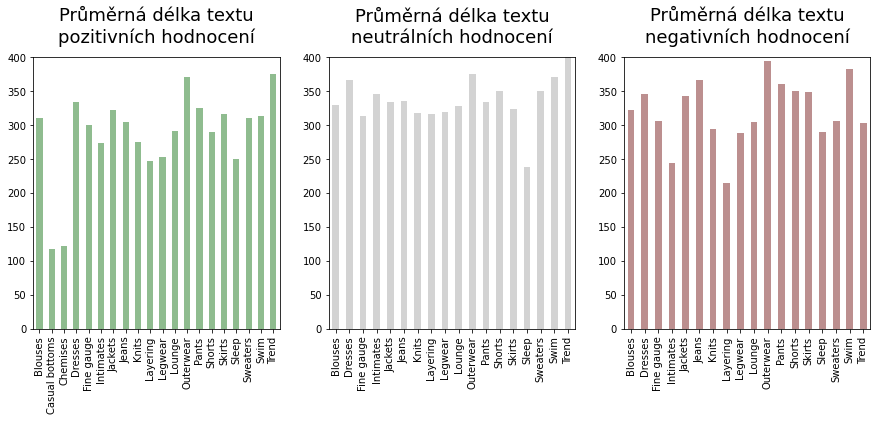

In [23]:
# Zobrazíme průměr délek recenzí dle kategorií a hodnocení(pozitivní, neutrální, negativní)
plt.figure(figsize=(15, 5))

# Pozitivní hodnocení
plt.subplot(1,3,1)
positive.groupby('Class')['ReviewLength'].mean().plot.bar(color = ['darkseagreen'])
plt.title('Průměrná délka textu\npozitivních hodnocení', fontsize = 18, pad = 15, loc = 'center')
plt.ylim(0, 400)
plt.xlabel('')

# Neutrální hodnocení
plt.subplot(1,3,2)
neutral.groupby('Class')['ReviewLength'].mean().plot.bar(color = ['lightgray'])
plt.title('Průměrná délka textu\nneutrálních hodnocení', fontsize = 18, pad = 15, loc = 'center')
plt.ylim(0, 400)
plt.xlabel('')

# Negativní hodnocení
plt.subplot(1,3,3)
negative.groupby('Class')['ReviewLength'].mean().plot.bar(color = ['rosybrown'])
plt.title('Průměrná délka textu\nnegativních hodnocení', fontsize = 18, pad = 15, loc = 'center')
plt.ylim(0, 400)
plt.xlabel('');

In [24]:
# Spojíme text pozitivních recenzí
PositiveText = ' '.join(review for review in positive['Review'])

# Spojíme text negativních recenzí
NegativeText = ' '.join(review for review in negative['Review'])

# Odstraníme speciální a nepotřebné znaky v pozitivním textu
characters = '.,?!\(\)\[\]\"\\+-_:;0123456789/#&$@*'
for char in characters:
    PositiveText = PositiveText.replace(char, '')

PositiveText = PositiveText.replace('\r\n', ' ')
PositiveText = PositiveText.replace('\n\n', ' ')

# Odstraníme speciální a nepotřebné znaky v negativním textu
characters = '.,?!\(\)\[\]\"\\+-_:;0123456789/#&$@*'
for char in characters:
    NegativeText = NegativeText.replace(char, '')

NegativeText = NegativeText.replace('\r\n', ' ')
NegativeText = NegativeText.replace('\n\n', ' ')

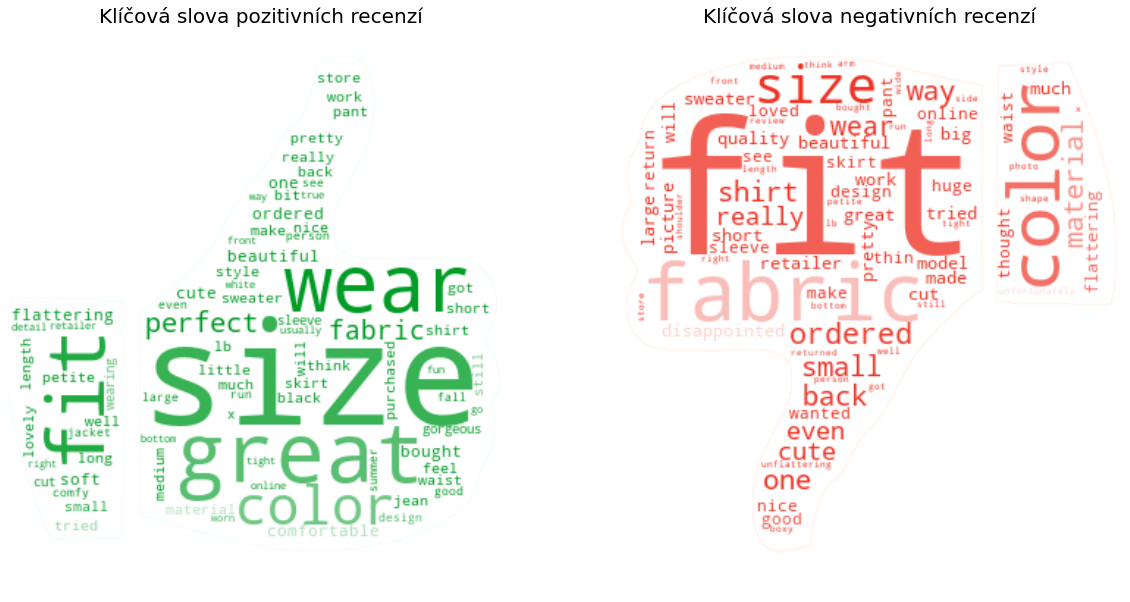

In [25]:
# Vizualizace textu recenzí ve word cloudu

# Určíme stop slova
stopwords = ['top', 'dress', 'love', 'look', 'looked', 'looks'] + list(STOPWORDS)

# Vzhled pozitivního textu
custom_mask = np.array(Image.open('positive.png'))
pwc = WordCloud(background_color = 'white', max_font_size = 160, max_words = 80, height = 1500, width = 1500, 
               stopwords = stopwords, mask = custom_mask, contour_width = 1, contour_color = 'mintcream')
pwc.generate(PositiveText)
image_colors = ImageColorGenerator(custom_mask)
pwc.recolor(color_func = image_colors)

# Vzhled negativního textu
custom_mask = np.array(Image.open('negative.png'))
nwc = WordCloud(background_color = 'white', max_font_size = 160, max_words = 80, height = 1500, width = 1500, 
               stopwords = stopwords, mask = custom_mask, contour_width = 1, contour_color = 'seashell')
nwc.generate(NegativeText)
image_colors = ImageColorGenerator(custom_mask)
nwc.recolor(color_func = image_colors)

# Vykreslení wordcloudů
plt.figure(figsize = (20, 20))
plt.subplot(1,2,1)
plt.imshow(pwc, interpolation = 'bilinear')
plt.title('Klíčová slova pozitivních recenzí', fontsize = 20, pad = 15, loc='center')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(nwc, interpolation = 'bilinear')
plt.title('Klíčová slova negativních recenzí', fontsize = 20, pad = 15, loc='center')
plt.axis('off');

#### Pozitivní recenze zmiňují správnou velikost, barvu, pohodlné nošení a přizpůsobení postavě. Negativní recenze poukazují především na skutečnost, že daný oděv nesedí správně, dále pak na nevyhovující látku, barvu a velikost oděvu.